# Lec 6.2

- Go over #3 from Monday (6.1)
- Do #4 as an exercise

- #5 Finding indices of interest with np.where

- Meshgrids

# 3 . Mask out regions outside of the tropics (google definition of tropics) and plot the annual mean again. Adjust the font size of your axes labels and title. Adjust the axis limits to be constrained to the data (i.e. no whitespace).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr

In [2]:
data=xr.open_dataset('C:\Bridgett\Bridgett\Introduction to Scientific computing\CESM.003.SST.1980.nc')

lat = np.array(data.lat)
lon = np.array(data.lon)
sst = np.array(data.SST)


In [3]:
sst_mean = np.mean(sst, axis = 0)
trop = 23.4368

In [9]:
mask = np.zeros_like(sst_mean)

In [11]:
for i in range(360):
    mask[:,i] = (lat> trop) | (lat< (-1*trop))

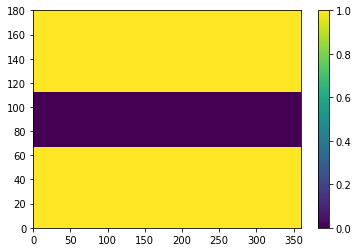

In [12]:
plt.pcolormesh(mask)
plt.colorbar()

In [13]:
# take the mean SST and mask
sst_trop = np.ma.masked_where(mask,sst_mean)


In [17]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 14

(-23.4368, 23.4368)

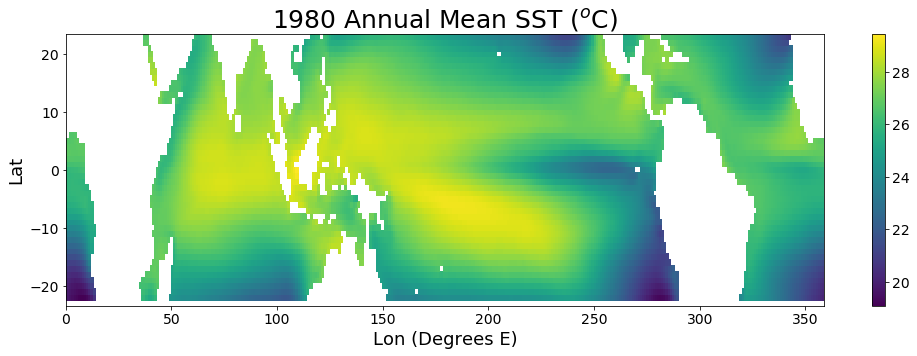

In [18]:
plt.figure(figsize=(17,5))
plt.pcolormesh(lon,lat,sst_trop)
plt.xlabel('Lon (Degrees E)', fontsize = 18)
plt.ylabel('Lat', fontsize = 18)
plt.colorbar()
plt.title('1980 Annual Mean SST ($^o$C)', fontsize = 25)
plt.ylim(-1*trop, trop)

# 4. Mask out the tropics and plot again.

In [20]:
for i in range(360):
    mask[:,i] = (lat< trop) & (lat> (-1*trop)) 

In [21]:
sst_nontrop = np.ma.masked_where(mask,sst_mean)


Text(0.5,1,'1980 Annual Mean SST ($^o$C)')

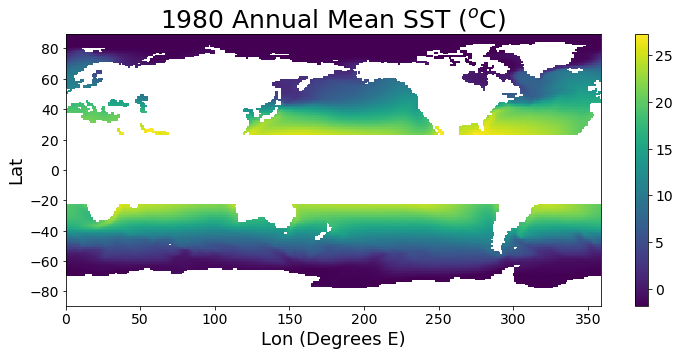

In [23]:
plt.figure(figsize=(12,5))
plt.pcolormesh(lon,lat,sst_nontrop)
plt.xlabel('Lon (Degrees E)', fontsize = 18)
plt.ylabel('Lat', fontsize = 18)
plt.colorbar()
plt.title('1980 Annual Mean SST ($^o$C)', fontsize = 25)

## Part 2: Finding data

# 5: Find the grid cell closest to us. Plot the seasonal cycle of SST. 

The latitude of South Padre Island is 26.1118° N, 97.1681° W

In [20]:
# use np.where to find elements that are greater than a given value
np.where(lat>26.1118)
# these are all the elements that are greater than 26

(array([116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179],
       dtype=int64),)

In [29]:
lat[21]

-68.5

In [25]:
# we can assign arrays to these indices where the constraint is true
#where is the temp greater than 20 C?
xind, yind = np.where(sst_mean > 20)

C:\Users\Bridgett\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
print(xind) #Corresponds to Lat
print(yind) #Corresponds to Lon


[ 53  53  53 ... 130 130 130]
[ 21  22  23 ... 296 297 298]


Text(0.5,1,'1980 Annual Mean SST ($^o$C)')

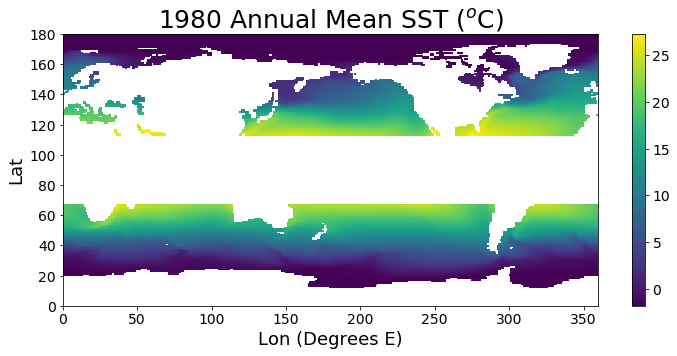

In [31]:
plt.figure(figsize=(12,5))
plt.pcolormesh(sst_nontrop)
plt.xlabel('Lon (Degrees E)', fontsize = 18)
plt.ylabel('Lat', fontsize = 18)
plt.colorbar()
plt.title('1980 Annual Mean SST ($^o$C)', fontsize = 25)

In [32]:
sst_mean[53,21] # yes this is greater than 20

20.000555

### back to the main problem

In [33]:
np.where(lat>26.1118)

(array([116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179],
       dtype=int64),)

In [34]:
xind= np.where(lat>26.1118)

In [35]:
# what kind of thing is xind? Tuple.
xind?

In [36]:
xind

(array([116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179],
       dtype=int64),)

In [37]:
xind[0]
# now we have an array

array([116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179],
      dtype=int64)

In [39]:
#Returns the index of the array
xind[0][0]

116

In [42]:
#Returns the value of the indexed element
lat[xind[0][0]]


26.5

In [40]:
# note lon is 0 to 360 East
# we want  97.1681° W = 360 - 97.1681 E
mylon = 360 - 97.1681
mylon

262.8319

In [53]:
#since our coordinates are in float and the data's coordinates are in int,
#We want to find the coordinate in the data that is closest to the float version
np.where(lon > 262.8319)[0][0]

263

In [56]:
#What is the value for the index 263?
lon[263]

263.0

In [47]:
np.where(lat>26.1118)[0][0]

116

In [48]:
lat[xind[0][0]]

26.5

In [57]:
lat[116]

26.5

In [58]:
sst_mean.shape
# remember this is lat by lon

(180, 360)

In [60]:
sst_mean[116,263]
# what is wrong here?

#Not a Number because it is on land
#We are analyzing *Sea* Surface temp

nan

(20, 40)

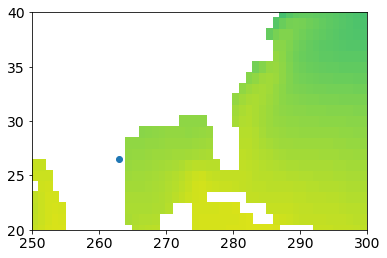

In [61]:
plt.pcolormesh(lon,lat,sst_mean)
plt.scatter(lon[263],lat[116]) #This is to make the point
plt.xlim(250,300)
plt.ylim(20,40)
#yeah, that's on land

(20, 40)

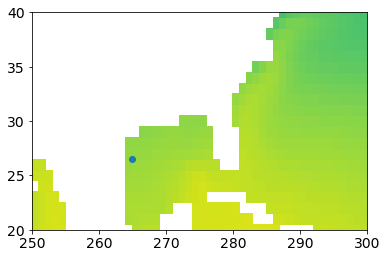

In [62]:
# let's try some investigative plotting
plt.pcolormesh(lon,lat,sst_mean)
plt.scatter(lon[265],lat[116])
plt.xlim(250,300)
plt.ylim(20,40)
#Now its in the gulf of mexico!

In [63]:
sst_mean[116,265]
# move over one to offshore

24.469347

Exercise: Make a line plot of the montly temperature at this location

1. Which month is it hottest? How hot is it?
2. Which is it coldest? How cold is it?

3. Now use max and min functions with np.where to find the above values

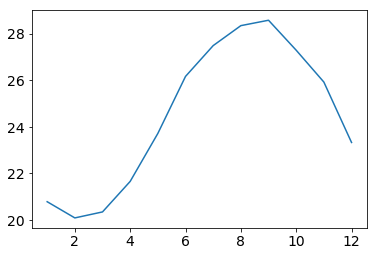

In [65]:
#plt.plot(x, y)
#x= np.arange(1,13) This gives a label to the ticks on the x axis for 12 mo.
#116,265 The cell that is closest to us
#sst[:,116,265] Gives us all SST points for that coordinate

plt.plot(np.arange(1,13), sst[:,116,265])

#At the 0th month there is no SST and at the 13th month, there is no SST???

**1. Which month is it hottest? How hot is it?**


In [66]:
mymax = sst[:,116,264].max()

In [68]:
mymax

28.368649

In [69]:
np.where(sst[:,116,264] == mymax)[0][0]

8

The hottest month is at index 8, which corresponds to the month of September. The Sea Surface Temperature at our location with index (116,264) was 28.368649 degrees celcius.

In [70]:
mymin = sst[:,116,264].min()

In [71]:
mymin

20.171156

In [72]:
np.where(sst[:,116,264] == mymin)[0][0]

1

The coldest month is at index 1, which corresponds to the month of February. The Sea Surface Temperature at our location with index (116,264) in Febrary was 20.171156 degrees celcius.

## Part 3: Meshes

See https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html

Suppose we want to plot a 2D function. When we wanted to plot a 1D function we used an np.arange or np.linspace

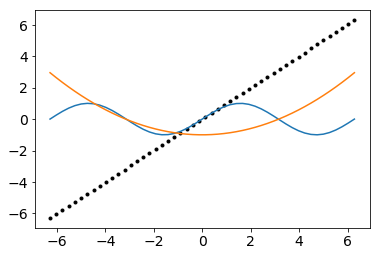

In [58]:
#This is our basis array 
x = np.linspace(-np.pi*2, np.pi*2, 50) # the x values to evaluate a function at
#We can use this basis array to plug into a function
# we can use the x values above to evaluate any function
#For the linspce we go from -np.pi*2 to np.pi*2 and have 50 points in between
y1 = np.sin(x)
y2 = 0.1* x**2 -1

plt.plot(x,x, '.k') #. is to have a dotted line , k is to make it black
plt.plot(x,y1)
plt.plot(x,y2)

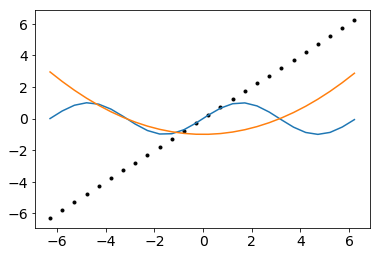

In [60]:
# similarly
#x = np.linspace(-np.pi*2, np.pi*2, 100) # the x values to evaluate a function at
x = np.arange(-np.pi*2, np.pi*2, .5) # the x values to evaluate a function at
#in the arange the 0.5 is the increment

# we can use the x values above to evaluate any function
y1 = np.sin(x)
y2 = 0.1* x**2 -1

plt.plot(x,x,'k.')
plt.plot(x,y1)
plt.plot(x,y2)

Exercise: In words, what is different about the arange and linspace x arrays? 

Now we want to plot a 2D function, so we need a point x and a point y to evaluate for every location on the 2D grid. 

In [61]:
x = np.linspace(-np.pi*2, np.pi*2, 50)
y = np.linspace(-1,1,50)
X,Y = np.meshgrid(x,y)

Exercise: what are X and Y? Plot them

In [62]:
x.shape

(50,)

In [63]:
X.shape

(50, 50)

In [66]:
(X)

array([[-6.28318531, -6.02672876, -5.77027222, ...,  5.77027222,
         6.02672876,  6.28318531],
       [-6.28318531, -6.02672876, -5.77027222, ...,  5.77027222,
         6.02672876,  6.28318531],
       [-6.28318531, -6.02672876, -5.77027222, ...,  5.77027222,
         6.02672876,  6.28318531],
       ...,
       [-6.28318531, -6.02672876, -5.77027222, ...,  5.77027222,
         6.02672876,  6.28318531],
       [-6.28318531, -6.02672876, -5.77027222, ...,  5.77027222,
         6.02672876,  6.28318531],
       [-6.28318531, -6.02672876, -5.77027222, ...,  5.77027222,
         6.02672876,  6.28318531]])

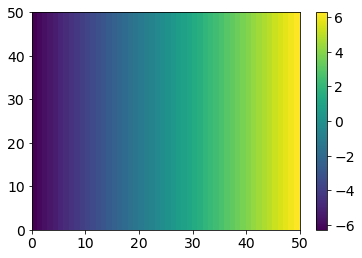

In [67]:
plt.pcolormesh(X)
plt.colorbar()

ValueError: not enough values to unpack (expected 2, got 1)

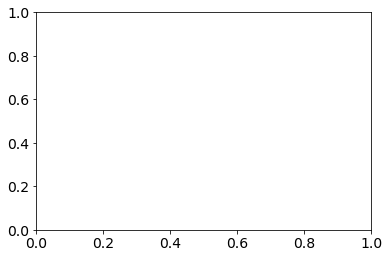

In [70]:
plt.pcolormesh(x)
plt.colorbar()

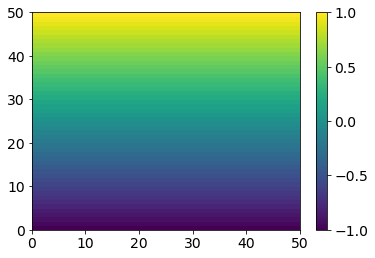

In [68]:
plt.pcolormesh(Y)
plt.colorbar()

TypeError: Illegal arguments to pcolormesh; see help(pcolormesh)

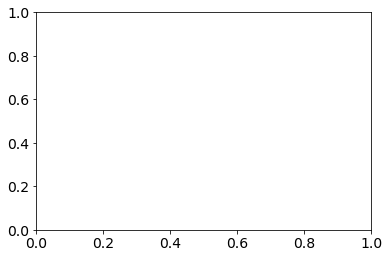

In [69]:
plt.pcolormesh(X,Y)
plt.colorbar()

We can use X and Y to evaluate a function

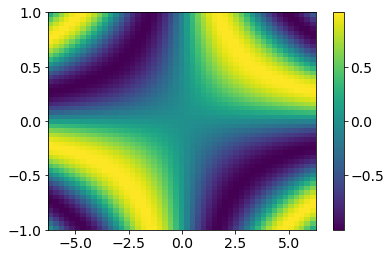

In [71]:
z = np.sin(X*Y)
plt.pcolormesh(x,y,z) #Because we put the x and y values in here, we changed the axis numbers
plt.colorbar()

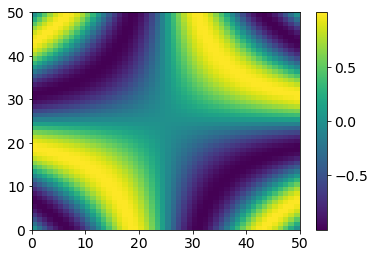

In [73]:
plt.pcolormesh(z)
plt.colorbar()
#0-50 is the index! 

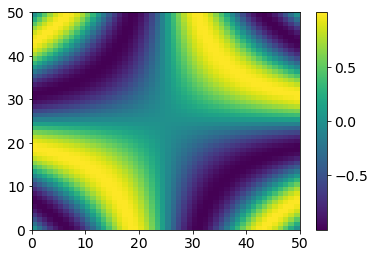

In [74]:
z = np.sin(X*Y)
plt.pcolormesh(z) 
plt.colorbar()

In [72]:
z.shape

(50, 50)

Note that in the above, x and y were used to plot z. We can also use X and Y

In [ ]:
z = np.sin(X*Y)
plt.pcolormesh(X,Y,z) 
plt.colorbar()

Exercise: Could we use x and y to define z above? Why or why not?

Exercise: Do exercises 3 and 4 above using meshgrids instead of for loops